### **Importing Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
plt.rc("font", size=15)
import warnings
warnings.simplefilter(action='ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
all_data=pd.concat([train,test], axis=0)
all_data.shape

(2919, 81)

In [7]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### **Separating DataSet**

Divide the dataset into two part based on Categorical data and Numerical Data For Better Transfomation

In [9]:
cat_data, num_data =[],[]
for i in all_data.columns:
    j = all_data.dtypes[i]
    if j=='object':
        cat_data.append(i)
    else:
        num_data.append(i)
    
print("categorical Data:\n{}".format(cat_data))
print("categorical Data:\n{}".format(len(cat_data)))
print("Numerical Data:\n{}".format(num_data))
print("Numerical Data:\n{}".format(len(num_data)))

categorical Data:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
categorical Data:
43
Numerical Data:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Ga

In [10]:
for col in all_data.select_dtypes('O').columns:
    print('We have {} unique value in {} column :{}'.format(len(all_data[col].unique()),col,all_data[col].unique()))
    print('-*'*50)

We have 6 unique value in MSZoning column :['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
We have 2 unique value in Street column :['Pave' 'Grvl']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
We have 3 unique value in Alley column :[nan 'Grvl' 'Pave']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
We have 4 unique value in LotShape column :['Reg' 'IR1' 'IR2' 'IR3']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
We have 4 unique value in LandContour column :['Lvl' 'Bnk' 'Low' 'HLS']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
We have 3 unique value in Utilities column :['AllPub' 'NoSeWa' nan]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

In [11]:
year = [feature for feature in num_data if 'Mo' in feature or 'Yr' in feature or 'Year' in feature]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [12]:
print('categorical columns Unique values count\n')
for col in cat_data:
    print(col,'-'*(30-len(col)),'>',len(all_data[col].unique()))

categorical columns Unique values count

MSZoning ---------------------- > 6
Street ------------------------ > 2
Alley ------------------------- > 3
LotShape ---------------------- > 4
LandContour ------------------- > 4
Utilities --------------------- > 3
LotConfig --------------------- > 5
LandSlope --------------------- > 3
Neighborhood ------------------ > 25
Condition1 -------------------- > 9
Condition2 -------------------- > 8
BldgType ---------------------- > 5
HouseStyle -------------------- > 8
RoofStyle --------------------- > 6
RoofMatl ---------------------- > 8
Exterior1st ------------------- > 16
Exterior2nd ------------------- > 17
MasVnrType -------------------- > 5
ExterQual --------------------- > 4
ExterCond --------------------- > 5
Foundation -------------------- > 6
BsmtQual ---------------------- > 5
BsmtCond ---------------------- > 5
BsmtExposure ------------------ > 5
BsmtFinType1 ------------------ > 7
BsmtFinType2 ------------------ > 7
Heating ------------

###**Missing Value**

<AxesSubplot:>

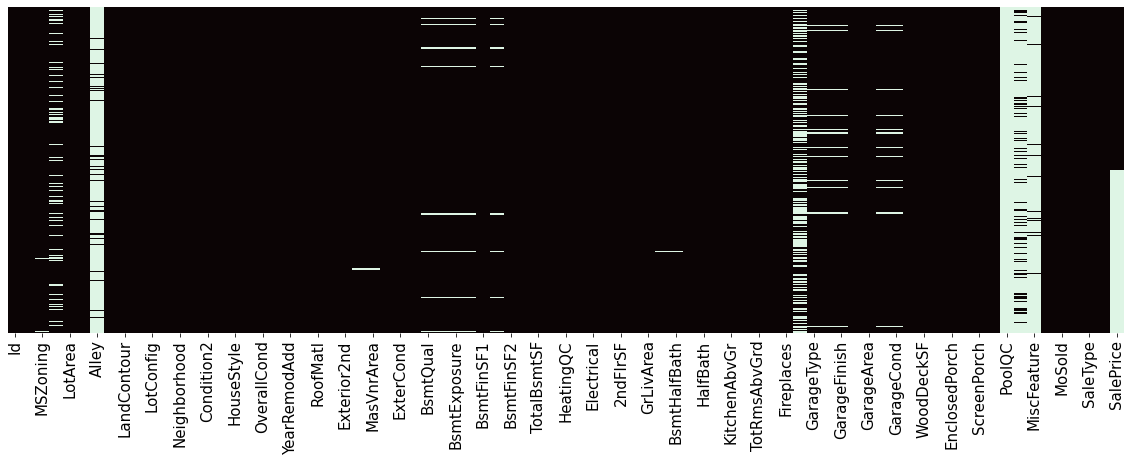

In [13]:
plt.figure(figsize=(20,6));
sns.heatmap(all_data.isnull(),yticklabels=False, cbar=False, cmap='mako')

In [14]:
def percentofdata(sepdata,allData):
    variable =[feature for feature in sepdata if allData[feature].isnull().sum()]
    for feature in variable:
        print("{}: {}%".format(feature,np.round(allData[feature].isnull().mean(),3)))

In [15]:
print("--------Categorical Data %--------")
percentofdata(cat_data,all_data)

--------Categorical Data %--------
MSZoning: 0.001%
Alley: 0.932%
Utilities: 0.001%
Exterior1st: 0.0%
Exterior2nd: 0.0%
MasVnrType: 0.008%
BsmtQual: 0.028%
BsmtCond: 0.028%
BsmtExposure: 0.028%
BsmtFinType1: 0.027%
BsmtFinType2: 0.027%
Electrical: 0.0%
KitchenQual: 0.0%
Functional: 0.001%
FireplaceQu: 0.486%
GarageType: 0.054%
GarageFinish: 0.054%
GarageQual: 0.054%
GarageCond: 0.054%
PoolQC: 0.997%
Fence: 0.804%
MiscFeature: 0.964%
SaleType: 0.0%


In [16]:
print("--------Numerical Data %--------")
percentofdata(num_data,all_data)

--------Numerical Data %--------
LotFrontage: 0.166%
MasVnrArea: 0.008%
BsmtFinSF1: 0.0%
BsmtFinSF2: 0.0%
BsmtUnfSF: 0.0%
TotalBsmtSF: 0.0%
BsmtFullBath: 0.001%
BsmtHalfBath: 0.001%
GarageYrBlt: 0.054%
GarageCars: 0.0%
GarageArea: 0.0%
SalePrice: 0.5%


In [17]:
# Fill the Miscellaneous Features with none value
all_data.fillna({'Alley': 'None', 'Fence':'None', 'MiscFeature':'None', 
           'PoolQC':'None', 'FireplaceQu':'None', 'MasVnrType':'None'}, inplace = True)

#Fill the basement(Categorical) with none value.
all_data.fillna({'BsmtQual':'None', 'BsmtCond':'None',
           'BsmtExposure':'None', 'BsmtFinType1':'None',
           'BsmtFinType2':'None'},inplace=True)

#Fill the Basement Columns(Numerical) with value 0 in empty field. 
Bsmt_con = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF']
for Bsmt in Bsmt_con:
    all_data[Bsmt].fillna(0, inplace=True) 
    
#Fill the missing Garage columns(Categorical) with none value.
all_data.fillna({'GarageType':'None','GarageCond': 'None', 'GarageQual':'None', 
           'GarageQual':'None', 'GarageFinish': 'None'}, inplace=True)

#Fill the Missing Garage Columns(Numerical) with none value
all_data.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

#Replacing Other categorical missing variable with its mode
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['Functional']=all_data['Functional'].fillna(all_data['Functional'].mode()[0])
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Utilities']=all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['LotFrontage']=all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].median())

all_data['Exterior1st'].fillna('Other' ,inplace=True)
all_data['Exterior2nd'].fillna('Other' ,inplace=True)

<AxesSubplot:>

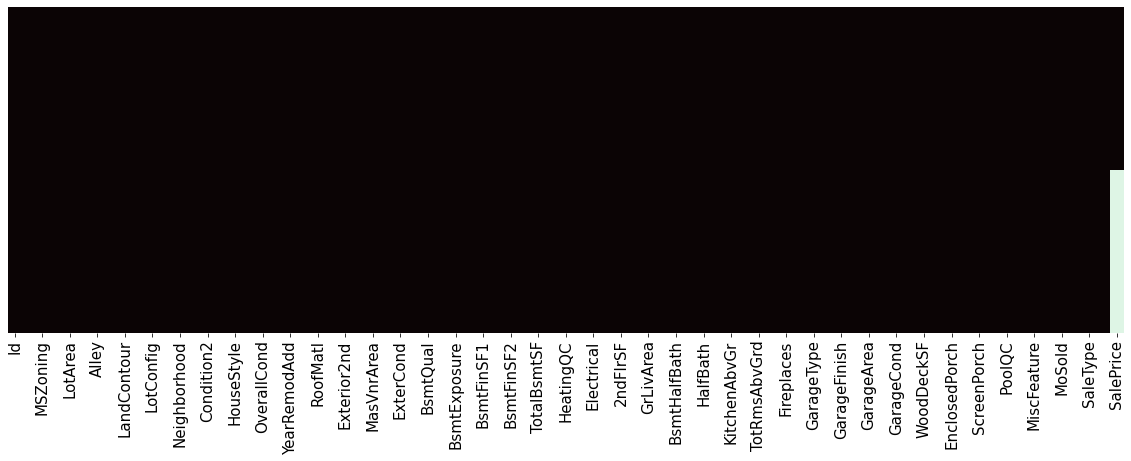

In [18]:
plt.figure(figsize=(20,6));
sns.heatmap(all_data.isnull(),yticklabels=False, cbar=False, cmap='mako')

### **Correlation**

In [19]:
corr =all_data.corr()
corr.sort_values(['SalePrice'], ascending= False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.469056
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334820
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

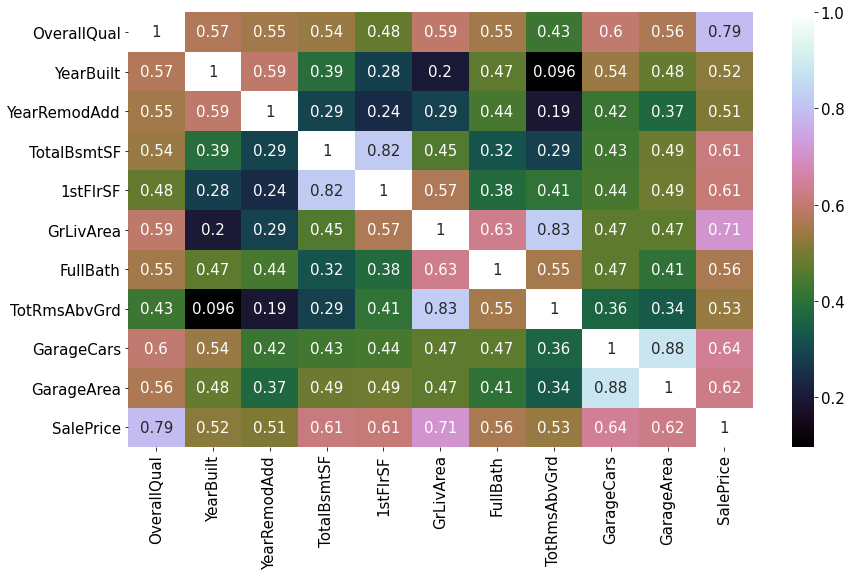

In [20]:
# most correlated features
corrplot = train.corr()
highCorrFeatures = corrplot.index[abs(corrplot["SalePrice"])>0.5]
plt.figure(figsize=(14,8))
g = sns.heatmap(train[highCorrFeatures].corr(),annot=True,cmap="cubehelix")

### **Categorical in Number**

In [21]:
catNum = [feature for feature in num_data if len(all_data[feature].unique())<20 and feature not in year+['Id']]

### Continous Number

In [22]:
contineousNum = [feature for feature in num_data if len(all_data[feature]) and feature not in year+['Id']+catNum]



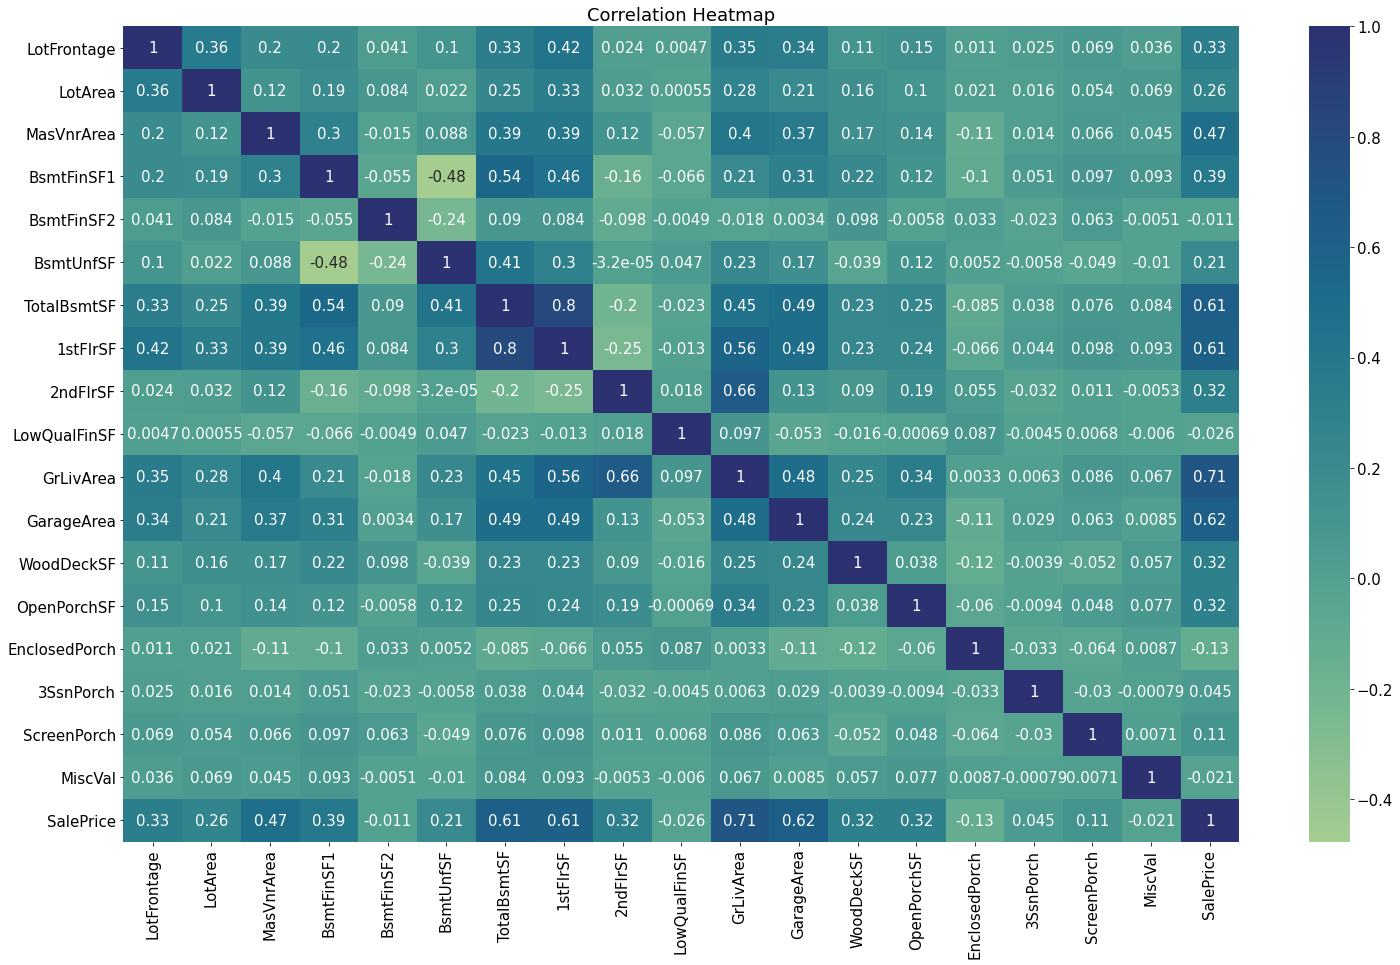

In [23]:
plt.figure(figsize=(25, 15))
heatmap =sns.heatmap(all_data[contineousNum].corr(), annot = True,  cmap="crest")
heatmap.set_title('Correlation Heatmap');

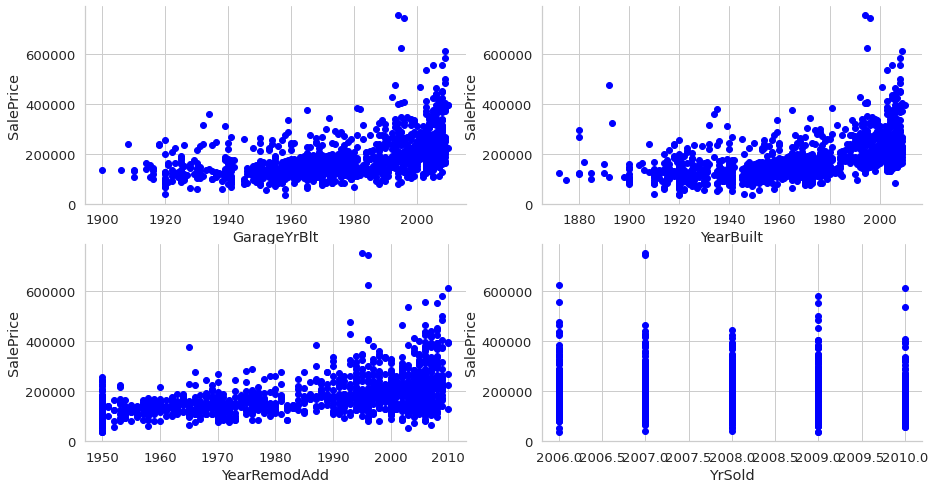

In [24]:
year_features = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']

plt.figure(figsize=(15, 8))
sns.set(font_scale= 1.2)
sns.set_style('whitegrid')

for i, features in enumerate(year_features):
    plt.subplot(2, 2, i+1)
    plt.scatter(data=train, x=features, y='SalePrice', color ="blue")  
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
sns.despine()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

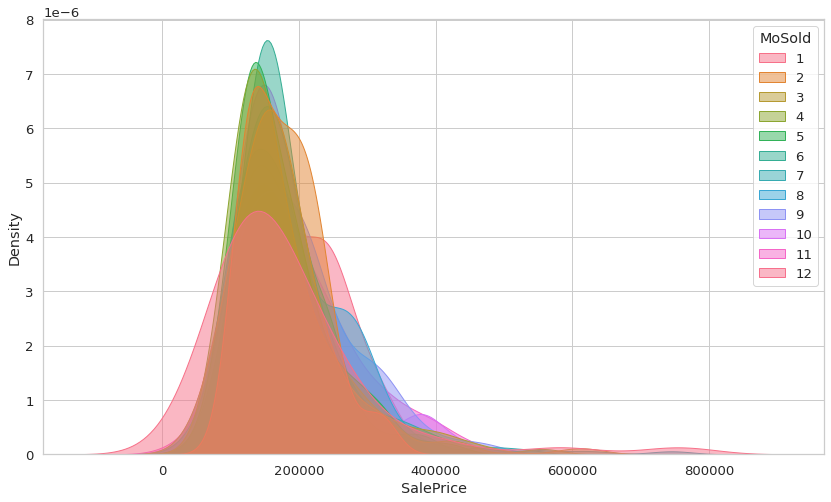

In [25]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=train,x="SalePrice", hue ="MoSold", fill=True,common_norm=False, palette="husl", alpha=.5, linewidth=1)

**Attribute**

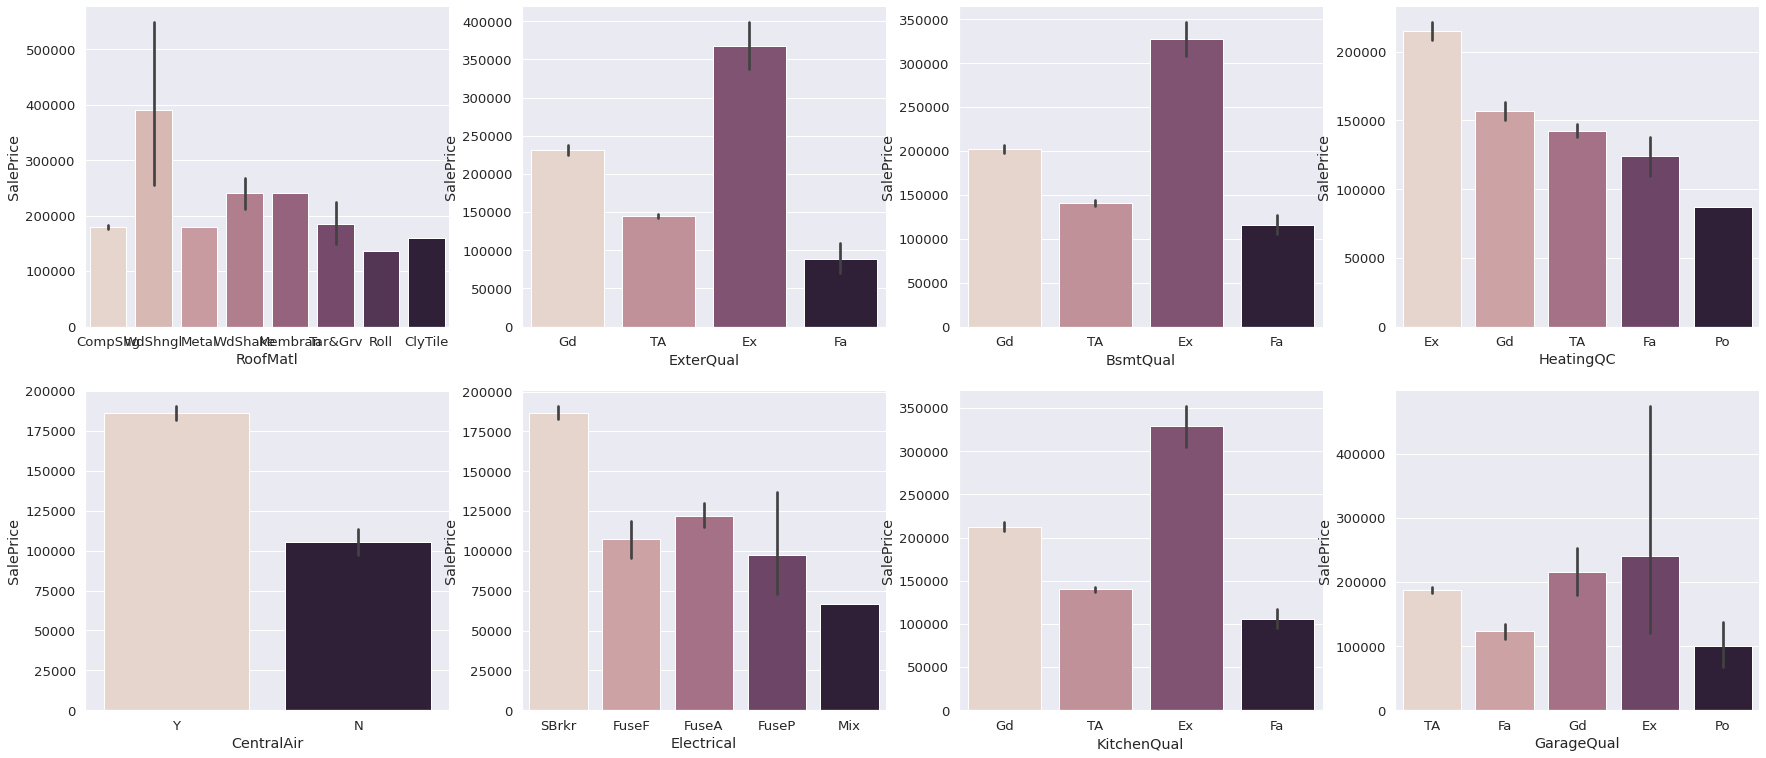

In [26]:
Quality_features = [ 'RoofMatl', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageQual']

plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for i, feature in enumerate(Quality_features):
    plt.subplot(3, 4, i+1)
    sns.barplot(data=train, x=feature, y='SalePrice', palette="ch:.10")  
    
    
sns.despine()

**outliers**

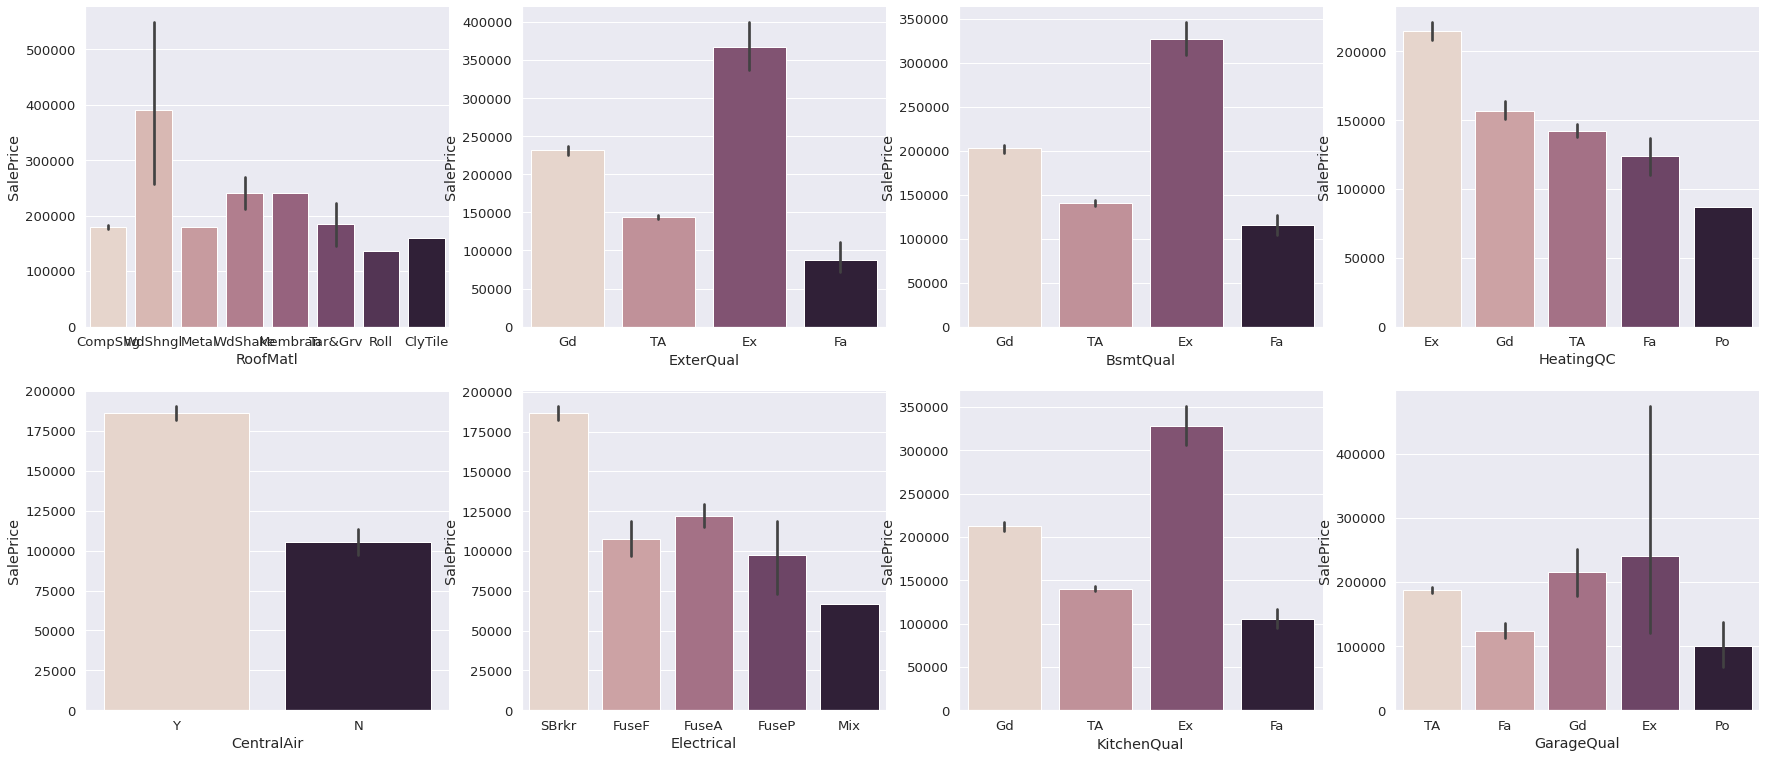

In [27]:
Quality_features = [ 'RoofMatl', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageQual']

plt.figure(figsize=(30, 20))
sns.set(font_scale= 1.2)
sns.set_style('darkgrid')

for i, feature in enumerate(Quality_features):
    plt.subplot(3, 4, i+1)
    sns.barplot(data=train, x=feature, y='SalePrice', palette="ch:.10")  
    
    
sns.despine()

In [28]:
all_data.LotFrontage[(all_data.LotFrontage >= 160)] = 160
all_data.LotArea[(all_data.LotArea >= 75000)] = 75000
all_data.MasVnrArea[(all_data.MasVnrArea >= 1000)] = 1000
all_data.BsmtFinSF1[(all_data.BsmtFinSF1 >= 2500)] = 2500
all_data.TotalBsmtSF[(all_data.TotalBsmtSF >= 3000)] = 3000
all_data['1stFlrSF'][(all_data['1stFlrSF'] >= 3000)] = 3000
all_data.GrLivArea[(all_data.GrLivArea >= 3500)] = 3500
all_data.GarageArea[(all_data.GarageArea >= 1500)] = 1500

**Data Transformation**

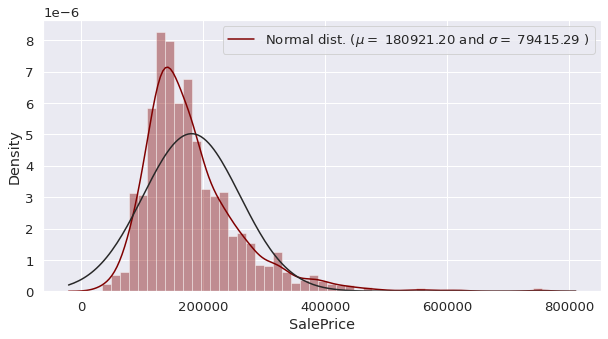

In [29]:
plt.figure(figsize=(10, 5))
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(all_data.iloc[:len(train)]['SalePrice'] , fit=norm, color='maroon');
(mu, sigma) = norm.fit(all_data.iloc[:len(train)]['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

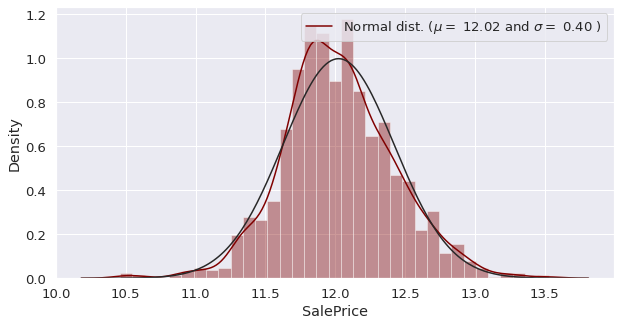

In [30]:
plt.figure(figsize=(10, 5))
all_data['SalePrice'] = np.log1p(all_data.iloc[:len(train)]['SalePrice'])
sns.distplot(all_data.iloc[:len(train)]['SalePrice'] , fit=norm, color='maroon')
(mu, sigma) = norm.fit(all_data.iloc[:len(train)]['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

In [31]:
#if it is more than 1 or -1 it is highly skewed and between 0.5 and 1 it is moderatly skewed, between 0.5 and 0 it is almost symmetric
skewed_clm = all_data[contineousNum].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_clm= skewed_clm[skewed_clm > 0.75]
skewed_clm= skewed_clm.index

all_data[skewed_clm] = np.log1p(all_data[skewed_clm])

In [32]:
all_data =pd.get_dummies(all_data, columns=cat_data, drop_first=True)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
del all_data['TotalBsmtSF']
del all_data['1stFlrSF']
del all_data['2ndFlrSF']

### **Tarin-Test Data**

In [33]:
from sklearn.model_selection import train_test_split
new_train = all_data.iloc[:1460,:]
new_test = all_data.iloc[1460:,:]
x = new_train.drop(['SalePrice'], axis=1)
y = new_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # 75% training and 25% test

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [35]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [36]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 0.08438470102743689
MSE: 0.015892631859327818
RMSE: 0.12606598216540343
R2 Square 0.9082184191234266
******************************
Train set evaluation:

MAE: 0.07548590262540451
MSE: 0.013327788024575253
RMSE: 0.11544603944949888
R2 Square 0.9138395388292053


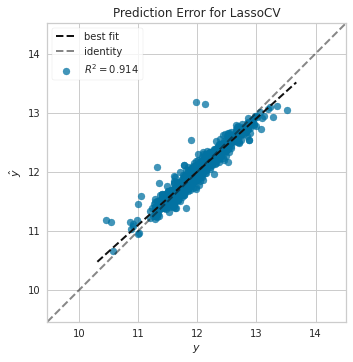

<AxesSubplot:title={'center':'Prediction Error for LassoCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
from yellowbrick.regressor import PredictionError
vis = PredictionError(lasso)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

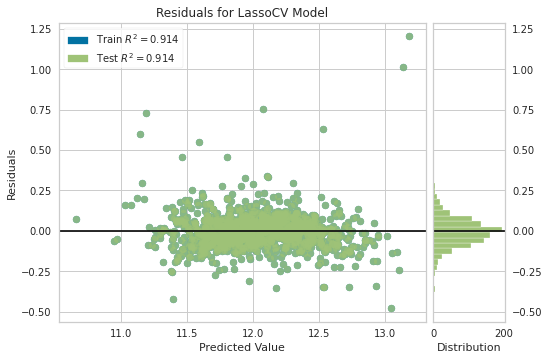

<AxesSubplot:title={'center':'Residuals for LassoCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
from yellowbrick.regressor import ResidualsPlot
vis = ResidualsPlot(lasso)
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()

In [39]:
lasso.fit(X_train, y_train)
train_pred = np.expm1(lasso.predict(X_train))
pred = np.expm1(lasso.predict(X_test))
print('Test set evaluation:\n')
print_evaluate(np.expm1(y_test), pred)
print('*'*30)
print('Train set evaluation:\n')
print_evaluate(np.expm1(y_train),train_pred)

Test set evaluation:

MAE: 14861.79485297597
MSE: 670184759.0270702
RMSE: 25887.92689705126
R2 Square 0.9043318782911838
******************************
Train set evaluation:

MAE: 13951.067710743377
MSE: 706708397.6441967
RMSE: 26583.987617439878
R2 Square 0.8836012872656289


In [40]:
final_test=new_test.copy()
X = new_test.drop(['SalePrice'], axis=1)
Y = new_test[['SalePrice']]

In [41]:
final_test['SalePrice'] = np.expm1(lasso.predict(X))
final_test['Id'] = new_test['Id']

logistic_submission = final_test[['Id','SalePrice']]

logistic_submission.to_csv("submission.csv", index=False)

logistic_submission.tail()

,Id,SalePrice
1454,2915,88501.755624
1455,2916,90512.970435
1456,2917,169755.422536
1457,2918,120299.913639
1458,2919,231519.267467
